In [1]:
#dependencies
import requests
from pprint import pprint
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading the academy award winning gender race csv 
award_gender_csv = 'Output/award_winning_gender_race.csv'
award_gender_df = pd.read_csv(award_gender_csv)

#adding a Type column to identify this dataframe when we merge below
award_gender_df['Type'] = 'Academy Award Films'
award_gender_df.head()

,Year,Movie Title,Actor,Gender,Race,Type
0,1927,Wings,Clara Bow,Female,White,Academy Award Films
1,1927,Wings,Charles 'Buddy' Rogers,Male,White,Academy Award Films
2,1927,Wings,Richard Arlen,Male,White,Academy Award Films
3,1927,Wings,Jobyna Ralston,Female,White,Academy Award Films
4,1928,The Broadway Melody,Charles King,Male,White,Academy Award Films


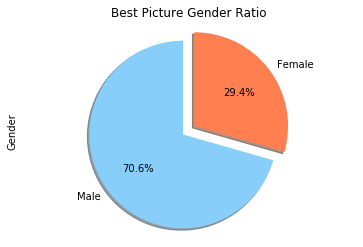

In [3]:
#plotting the pie chart for best picture gender percentages
award_gender_pie = award_gender_df["Gender"].value_counts()

colors = ['lightskyblue', 'coral']
explode = (0, 0.15)

award_gender_pie.plot(kind="pie",autopct="%1.1f%%", explode=explode, colors=colors,shadow=True, startangle=90)

plt.title("Best Picture Gender Ratio")
plt.axis("equal")

#saving figure to png file and showing in notebook
plt.savefig("Images/Award_Gender.png")

plt.show()

In [4]:
#reading the top grossing gender race csv 
topgrossing_gender_csv = 'Output/top_grossing_film_gender_race.csv'
topgrossing_gender_df = pd.read_csv(topgrossing_gender_csv)

#renaming column Actors to Actor
topgrossing_gender_df = topgrossing_gender_df.rename(columns = {"Actors" : "Actor"})

#adding a Type column to identify this dataframe when we merge below
topgrossing_gender_df['Type'] = "Top Grossing Films"
topgrossing_gender_df.head()

,Year,Movie Title,Actor,Gender,Race,Type
0,1927,The Battles of the Coronel and Falkland Islands,Roger Maxwell,Male,White,Top Grossing Films
1,1927,The Battles of the Coronel and Falkland Islands,Craighall Sherry,Male,White,Top Grossing Films
2,1927,The Battles of the Coronel and Falkland Islands,Hans von Slock,Male,White,Top Grossing Films
3,1928,Lights of New York,Helene Costello,Female,White,Top Grossing Films
4,1928,Lights of New York,Cullen Landis,Male,White,Top Grossing Films


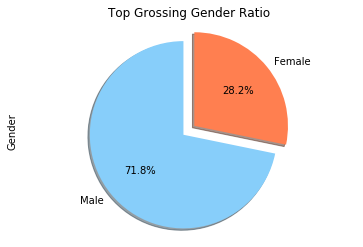

In [5]:
#plotting the pie chart for top grossing films gender percentages
topgrossing_gender_pie = topgrossing_gender_df["Gender"].value_counts()

colors = ['lightskyblue', 'coral']
explode = (0, 0.15)

topgrossing_gender_pie.plot(kind="pie",autopct="%1.1f%%", explode=explode, colors=colors,shadow=True, startangle=90)

plt.title("Top Grossing Gender Ratio")
plt.axis("equal")

#saving figure to png file and showing in notebook
plt.savefig("Images/TopGrossing_Gender.png")

plt.show()

In [6]:
#combined above two dataframes
combined_gender = award_gender_df.append(topgrossing_gender_df)
combined_gender.head()

,Year,Movie Title,Actor,Gender,Race,Type
0,1927,Wings,Clara Bow,Female,White,Academy Award Films
1,1927,Wings,Charles 'Buddy' Rogers,Male,White,Academy Award Films
2,1927,Wings,Richard Arlen,Male,White,Academy Award Films
3,1927,Wings,Jobyna Ralston,Female,White,Academy Award Films
4,1928,The Broadway Melody,Charles King,Male,White,Academy Award Films


In [7]:
#grouping by Type and then Gender and counting how many by using the Actor column
grouped_gender = combined_gender.groupby(['Type', 'Gender']).count()['Actor']
grouped_gender

Type                 Gender
Academy Award Films  Female    108
                     Male      259
Top Grossing Films   Female    103
                     Male      262
Name: Actor, dtype: int64

In [8]:
#re-indexing the groupby to get a better view and work wit the dataframe
indexed_gender = grouped_gender.reset_index()
indexed_gender

,Type,Gender,Actor
0,Academy Award Films,Female,108
1,Academy Award Films,Male,259
2,Top Grossing Films,Female,103
3,Top Grossing Films,Male,262


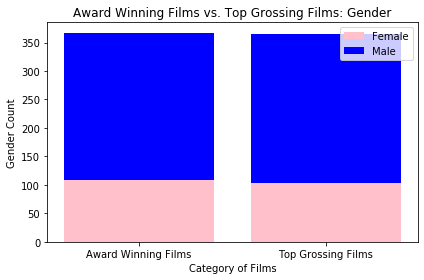

In [10]:
#plotting a stacked bar graph to compare the number of males and females in the award winning films and top grossing films
values_gender = ['Award Winning Films', 'Top Grossing Films']
N = 2
xaxis = np.arange(N)
female = tuple(indexed_gender[indexed_gender['Gender'] == 'Female']['Actor'])
male = tuple(indexed_gender[indexed_gender['Gender'] == 'Male']['Actor'])
fig1 = plt.bar(xaxis, female, color = 'pink')
fig2 = plt.bar(xaxis, male,
               bottom = female,
              color = 'blue')
plt.xticks(xaxis, values_gender)
plt.xlabel('Category of Films')
plt.ylabel('Gender Count')
plt.title('Award Winning Films vs. Top Grossing Films: Gender')
plt.tight_layout()
plt.legend((fig1[0], fig2[0]), ('Female', 'Male'))

#saving figure to png file and showing in notebook
plt.savefig("Images/Stacked_Bar_Gender.png")

plt.show()